In [ ]:
using LinearAlgebra, RowEchelon, LaTeXStrings, Plots, SymPy

<div style="float:center;width:100%;text-align: center;"><strong style="height:60px;color:darkred;font-size:40px;">The Pseudoinverse</strong><br><strong style="height:100px;color:darkred;font-size:25px;">Moore-Penrose Inverse</strong></div>

<div style="float:left;width:35%;height:6.8cm;border:1px solid black;padding:10px;">

$\left. \begin{align}
    y & = U \Sigma V^t x \\
    x &= V \tilde{x} \\
    \tilde{y} & = \Sigma \tilde{x} \\
    \end{align} \right\} \Rightarrow y = U \Sigma \tilde{x} = U \tilde{y}.$
    
* $\color{green}{x = V \tilde{x}}\;\;$ change to $V_r, \tilde{V}_r$ coordinates
* $\color{blue}{\tilde{x}_r = V_r x} \;$ drop the null space component
* $\color{blue}{\tilde{y}_r = \Sigma_r \tilde{x}_r}$ **scale** and map to $U_r, \tilde{U}_r$ coordinates
* $\color{red}{y = U \tilde{y}_r}\;$ change to the $y$ coordinates
    
The transformation $\mathscr{R}(A) \xrightarrow{\Sigma} \mathscr{C}(A)$ is 1-1 onto
</div>

<img src="Figs/SVDaction.svg" width=600 style="float:right;">

Let's follow this with some vector $x$ and the matrix $A$ from the previous example:

Take $x = \left(\begin{array}{r} 2 \\ 1 \\ - 1 \end{array}\right),\quad  \text{ then }\quad
\tilde{x} = V^t x = \frac{\sqrt{6}}{6} \left( \begin{array}{r} 3 \sqrt{3} \\ 0 \\ \hline \color{red}3 \end{array} \right),\quad
\tilde{y} = \Sigma \tilde{x} =
\left( \begin{array}{r} 12 \\ 0 \\  \hline \color{red}0 \\ \color{red}0 \\ \color{red}0 \end{array} \right), \quad
y = U \tilde{y} = 6 \left(\begin{array}{r} -1 \\ -1 \\ 1 \\ -1 \end{array}\right).
$

> Let us rewrite the SVD equation:<br>
> $\qquad \begin{align}A &= U_r \Sigma_r V_r^t = {\color{red}{\sigma_1}} u_1 v_1^t + {\color{red}{\sigma_2}} u_2 v_2^t + \dots {\color{red}{\sigma_r}} u_r v_r^t.
\end{align}$

> This clearly show the action of $A$ on a vector $x$:<br>
$\quad\quad\ {\color{red}{\sigma_i}}\ u_i v_i^t\; x = ({\color{red}{\sigma_i}}\ v_i \cdot x)\ u_i \quad$ computes the length of the orthogonal projection of $x$ onto $v_i$<br>
$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\;$ scales it by $\sigma_i$<br>
$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\;$ and assigns it to the corresponding vector $u_i$.

An alternate way of visualizing the action of $A$ is to consider $A \hat{x}$,<br>
i.e., the action of $A$ on vectors on a unit sphere.

[see: Steve Brunton, Unitary Transformations and the SVD](https://www.youtube.com/watch?v=_wOt50VnJw4)

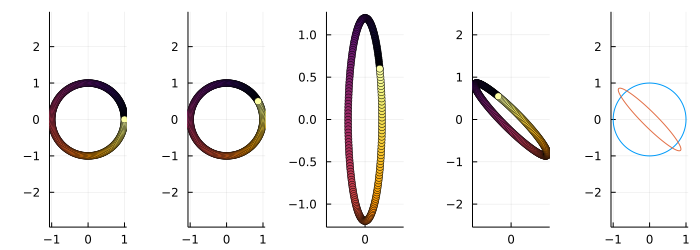

In [2]:
U = [1. -1; 1 1]/sqrt(2)
V = [sqrt(3) 1; -1 sqrt(3)]/2
Σ = [ 0.2 0; 0 1.2]
A = U*Σ*V

# define the unit circle
t = range(0,stop=2π,length=200)
x = [cos.(t) sin.(t)]'

# apply A = U Σ V' to each point on the circle
x̃ = V'x
ỹ = Σ*x̃
y = U*ỹ

p = plot( x[1,:],x[2,:] )
p = plot!(  y[1,:], y[2,:], aspect_ratio=:equal )
plot(
    scatter(x[1,:],x[2,:], zcolor=t, aspect_ratio=:equal),
    scatter(x̃[1,:],x̃[2,:], zcolor=t, aspect_ratio=:equal),
    scatter(ỹ[1,:],ỹ[2,:], zcolor=t, aspect_ratio=:equal),
    scatter(y[1,:],y[2,:], zcolor=t, aspect_ratio=:equal),
    p, xticks=[-1,0, 1],
    layout=(1,5), legend=:none, colorbar=:none, size=(700,250)
)

# 1. The Pseudoinverse

## 1.1. A Preimage of $y = A x$

Let $A = U \Sigma V^t$ be a singular value decomposition of $A$ and consider $A x = b.$

The substitutions $x = V \tilde{x}$ and $b = U \tilde{b}$ are invertible change of coordinates<br>
that **do not change the geometric description** of the transformation $A$.

$\qquad
A x = b
\quad  \Leftrightarrow \quad \Sigma V^t x = U^t b \quad \Leftrightarrow \quad
\; \Sigma \tilde{x} = \tilde{b},\;
\quad \text{ where } \quad
\Sigma = \begin{pmatrix} \Sigma_r & 0 \\ 0 & 0 \end{pmatrix}.\qquad\qquad (\text{Eq}_4)
$

----
Now split $\tilde{x} = \left( \begin{array}{c} \tilde{x}_r \\ \hline \tilde{\xi} \end{array} \right),
\tilde{b} = \left( \begin{array}{c} \tilde{b}_r \\ \hline \tilde{\beta} \end{array} \right)
$ where the first $r$ entries $\tilde{x}_r$ and $\tilde{b}_r$ <br>
$\quad\quad$ are the $\mathscr{R}(A)$ and $\mathscr{N}(A^t)$
components of the $\tilde{x}$ and $\tilde{b}$ vectors respectively.

Substituting these in Eq 4 yields $\tilde{x}_r = \Sigma_r \tilde{b}_r \Leftrightarrow \tilde{b}_r = \Sigma_r^{-1} \tilde{x}_r.\label{eqn5}\tag{5}$

The components $\tilde{\xi}$ and $\tilde{\beta}$ in the respective nullspaces
do not enter: they are irretrievably lost.<br>
$\quad\quad$ The $\Sigma_r$ matrix in Eq 5 however is invertible. 

---
**Remarks:**
* If we restrict the domain and codomain of $y = A x$ to $\mathscr{R}(A)$ and $\mathscr{C}(A)$ respectively,<br>
the transformation is 1-1 and onto, it is therefore invertible.<br><br>
* I.e., for $\tilde{x} = \left( \begin{array}{c} \tilde{x}_r \\ \hline 0 \end{array} \right),
\tilde{b} = \left( \begin{array}{c} \tilde{b}_r \\ \hline 0 \end{array} \right)$,
we have $\begin{pmatrix} \Sigma_r & 0 \\ 0 & 0 \end{pmatrix}\tilde{x} = \tilde{b} \Leftrightarrow
\tilde{b} = \begin{pmatrix} \Sigma_r^{-1} & 0 \\ 0 & 0 \end{pmatrix}\tilde{x} \Leftrightarrow
b = V \begin{pmatrix} \Sigma_r^{-1} & 0 \\ 0 & 0 \end{pmatrix} U^t x.
$

## 1.2 The Pseudoinverse and the Reduced Pseudoinverse

<div style="float:left;height:7cm;padding:5pt;background-color:#F2F5A9;color:black;">

**Definition:** Let $A$ in  $\mathbb{R}^{M \times N}$<br>$\quad$ have an SVD $A = U \Sigma V^t$.<br><br>
$\quad$ The pseudoinverse $A^\dagger = V \Sigma^\dagger U^t$, where<br><br>
    $\qquad\Sigma^\dagger = \begin{pmatrix} \Sigma_r& 0 \\ 0 & 0 \end{pmatrix}^\dagger =
    \begin{pmatrix} \Sigma_r^{-1} & 0 \\ 0 & 0 \end{pmatrix}$
</div>
<div style="float:left;height:7cm;padding:5pt;margin-left:1cm;">

**Remarks:**<br>
* If $A$ is invertible, $A^\dagger = A^{-1}.$
* The pseudoinverse has a reduced form: $A^\dagger = V_r \Sigma^{-1} U_r^t.$

<img src="Figs/PseudoInverse.svg" width=400/>
</div>

#### **Example**

##### **The Earlier SVD Example**

$\qquad\begin{align} A =&\ \left(\begin{array}{rrr}  -3 & -1 & -1 \\
-3 & -1 & -1 \\
1 & 3 & -1 \\
-1 & -3 & 1
 \end{array}\right)  = \; U \Sigma V^t \\[2mm] =&\
\frac{1}{2}\left( \begin{array}{rr|rr}
-1 & -1 & -\sqrt{2} & 0 \\
-1 & -1 &  \sqrt{2} & 0 \\
 1 & -1 & 0 &  \sqrt{2}\\
-1 &  1 & 0 &  \sqrt{2}
\end{array} \right) \quad
 \left(  \begin{array}{cc|c} \color{red}{4 \sqrt{2}} & 0 & 0\\
                                      0 & \color{red}{2 \sqrt{3}} & 0\\ \hline
                                      0 & 0 & 0 \\
                                      0 & 0 & 0
        \end{array}\right) \quad
 \frac{1}{6} \left( \begin{array}{cc|c} 3 \sqrt{2} &  2 \sqrt{3} &\sqrt{6}\\
                                            3 \sqrt{2} & -2 \sqrt{3} & -\sqrt{6} \\
                                            0          & 2 \sqrt{3} & -2 \sqrt{6} \end{array} \right)^t
\end{align}$

##### **The PseudoInverse**

$\qquad
A^\dagger = V_r \Sigma_r^{-1} U_r^t =
\frac{1}{6} \left( \begin{array}{cc} 3 \sqrt{2} &  2 \sqrt{3} \\
                                     3 \sqrt{2} & -2 \sqrt{3} \\
                                     0          & 2 \sqrt{3}  \end{array} \right)\;
 \left(  \begin{array}{cc|c} \color{red}{4 \sqrt{2}} & 0\\
                                      0 & \color{red}{2 \sqrt{3}}
        \end{array}\right)^{-1} \;
\frac{1}{2}\left( \begin{array}{rr}
-1 & -1 \\
-1 & -1 \\
 1 & -1 \\
-1 &  1 \end{array} \right)^t
$

$\qquad
A^\dagger = \frac{1}{48} \left(\begin{array}{rrrr}
-7 & -7 & -1 & 1 \\
1 & 1 & 7 & -7 \\
-4 & -4 & -4 & 4
\end{array}\right)
$

##### **Repeated Application of $A, A^\dagger$**

The following computation maps $\quad\quad$
$x \in \color{blue}{\mathbb{R}^3} \xrightarrow{A} \color{red}{b_\parallel} \in \color{blue}{\mathscr{C}(A)} \xrightarrow{A\dagger} \color{red}{x_\parallel} \in \color{blue}{\mathscr{R}(A)}  \xrightarrow{A} \color{red}{b_\parallel} \in \color{blue}{\mathscr{C}(A)}, $   $\quad\quad: {A A^\dagger A = A}$

$\qquad
x = \left(\begin{array}{r} 2\\ 1 \\ -1 \end{array}\right) \;\Rightarrow\;
{\color{red}{b_\parallel}} = A x = -6 \left(\begin{array}{r} 1 \\ 1 \\ -1 \\ 1 \end{array}\right)
\;\Rightarrow\;{\color{red}{x_\parallel}} = A^\dagger b_\parallel = \frac{3}{2}\left(\begin{array}{r} 1 \\ 1 \\ 0 \end{array}\right)
\;\Rightarrow\;{\color{red}{b_\parallel}} = A x_\parallel         =  -6 \left(\begin{array}{r} 1 \\ 1 \\ -1 \\ 1 \end{array}\right)
$

The following computation maps $\quad\quad$
$b \in \color{blue}{\mathbb{R}^4} \xrightarrow{A^\dagger} \color{red}{x_\parallel} \in \color{blue}{\mathscr{R}(A)} \xrightarrow{A} \color{red}{b_\parallel} \in \color{blue}{\mathscr{C}(A)}  \xrightarrow{A\dagger} \color{red}{x_\parallel} \in \color{blue}{\mathscr{R}(A)}, $   $\quad\quad: {A^\dagger A A^\dagger = A^\dagger}$

$\qquad
b = \left(\begin{array}{r} -7\\ -5 \\ 7 \\ -5 \end{array}\right)
\;\Rightarrow\; {\color{red}{x_\parallel}} = A^\dagger b = \frac{3}{2}\left(\begin{array}{c} 1 \\ 1 \\ 0 \end{array}\right)
\;\Rightarrow\; {\color{red}{b_\parallel}} = A x_\parallel = -6 \left(\begin{array}{r} 1 \\ 1 \\ -1 \\ 1 \end{array}\right)
\;\Rightarrow\; {\color{red}{ x_\parallel}} = A^\dagger b_\parallel = \frac{3}{2}\left(\begin{array}{c} 1 \\ 1 \\ 0 \end{array}\right)
$

## 1.3 **Projection Matrices**

$\qquad
A^\dagger A = \frac{1}{6}\left(\begin{array}{rrr}
5 & 1 & 2 \\
1 & 5 & -2 \\
2 & -2 & 2
\end{array}\right)\quad\quad \text{ is the orthogonal projection}\quad x \in \mathbb{R}^3 \xrightarrow{A^\dagger A} x_\parallel \in \mathscr{R}(A)
$

$\qquad
A A^\dagger = \frac{1}{2} \left(\begin{array}{rrrr}
1 & 1 & 0 & 0 \\
1 & 1 & 0 & 0 \\
0 & 0 & 1 & -1 \\
0 & 0 & -1 & 1
\end{array}\right)
\quad\quad \text{ is the orthogonal projection}\quad b \in \mathbb{R}^4 \xrightarrow{A A^\dagger} b_\parallel \in \mathscr{C}(A)
$

##### **Remarks**

* The preimage $x_\parallel = A^\dagger A x$ of $b = A x$ is the **minimum length** solution of $A x = b$
* The preimage $b_\parallel = A A^\dagger b$ of $x = A^\dagger b$ is the **minimum length** solution of $A^t b = x$

# 2. Application to the Normal Equation

<div style="float:left;width:40%;height:5.6cm;padding:5pt;">
<div style="background-color:#F2F5A9;color:black;padding-bottom:0.5cm;">

**Theorem:** Let $A$ in $\mathbb{R}^{M \times N}$<br>$\quad$ have an SVD factorization $A = U \Sigma V^t$.<br>
    $\quad$ Then $x = A^\dagger b \Rightarrow A^t A x = A^t b$
</div>
<br><br>

**Remark:** This theorem states that<br>$\qquad$  we can use the pseudoinverse<br>
    $\qquad$ to obtain a solution of the normal equation.
</div>
<div style="float:right;width:55%;border-left:2px solid black;padding-left:0.5cm;">
We have to show that $x^\dagger = A^\dagger b$ satisfies $A^t(A x^\dagger - b) = 0$<br><br>

$\begin{align}
A^t ( A x^\dagger - b ) &= A^t (U \Sigma V^t V \Sigma^\dagger U^t b -b) \\
                &= A^t U(\Sigma \Sigma^\dagger - I) U^t b \\
                &= V \Sigma^t (\Sigma \Sigma^\dagger - I) U^t b \\
                &= 0, \quad \text{since}
\end{align}$

$\begin{align}\Sigma^t ( \Sigma \Sigma^\dagger - I ) & = \Sigma^t \left(\begin{pmatrix} I & 0 \\ 0 & 0 \end{pmatrix} - I\right) = \Sigma^t \begin{pmatrix} 0 & 0 \\ 0 & -I \end{pmatrix} \\
&= \begin{pmatrix} \Sigma_r & 0 \\ 0 & 0 \end{pmatrix} \begin{pmatrix} 0 & 0 \\ 0 & -I \end{pmatrix} = 0\end{align}$
<div>

# 3. Take Away

Let $A = U \Sigma V$ with $\Sigma = \begin{pmatrix} \Sigma_r & 0 \\ 0 & 0 \end{pmatrix}.$
* The Pseudoinverse is defined to be $A^\dagger = V \Sigma^\dagger U^t$, where $\Sigma = \begin{pmatrix} \Sigma^{-1}_r & 0 \\ 0 & 0 \end{pmatrix}$<br><br>
* If $A$ is invertible, then $\Sigma = \Sigma_r,\;$ and $A^{-1} = \left( U \Sigma V \right)^{-1} = V \Sigma^{-1} U^t = V \Sigma^\dagger U^t = A^\dagger$

<div style="float:center;padding-top:1cm;">
<img src="Figs/PseudoInverse.svg" width=650 style="border:2px solid black;"/>
</div>